In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
# Importation de train_text
from sklearn.model_selection import train_test_split
#import accuracy store
from sklearn.metrics import accuracy_score
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import recall_score

from sklearn.metrics import precision_score



In [2]:
data=pd.read_excel('Coeur.xlsx')

In [3]:
#2. Faites une copie de l’objet “data” dans un nouvel objet appelé “df”.
df = data.copy()
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# verifier les doublons

In [6]:
df.duplicated().sum()

0

In [7]:
# df.drop_duplicates()   (suppression des doublons)

# Verification de constantes

In [8]:
import math
b = math.nan
print(np.isnan(b))


True


# Verification de donnée manquantes

In [9]:
df.isnull().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

# Normalisation de toutes les variables quantitatives


In [10]:
#ecart type  
# df_quant[col].std()

In [11]:
for col in df.drop('CŒUR', axis =1).select_dtypes(np.number).columns:
 df[col] = df[col]/df[col].max()


# encodage de toutes les variables qualitatives

In [12]:
def recoder_df(data):
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].astype('category').cat.codes
        return data
 

In [18]:
recoder_df(df)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.519481,1,0,0.70,0.479270,0.0,1,0.851485,0,0.000000,0,0
1,0.636364,0,3,0.80,0.298507,0.0,1,0.772277,0,0.161290,2,1
2,0.480519,1,0,0.65,0.469320,0.0,2,0.485149,0,0.000000,0,0
3,0.623377,0,1,0.69,0.354892,0.0,1,0.534653,1,0.241935,2,1
4,0.701299,1,3,0.75,0.323383,0.0,1,0.603960,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.584416,1,2,0.55,0.437811,0.0,1,0.653465,0,0.193548,2,1
914,0.883117,1,1,0.72,0.320066,1.0,1,0.698020,0,0.548387,2,1
915,0.740260,1,1,0.65,0.217247,0.0,1,0.569307,1,0.193548,2,1
916,0.740260,0,0,0.65,0.391376,0.0,0,0.861386,0,0.000000,2,1


# 8-separer la variable cible coeur des autres variables de df

In [19]:
x=df.drop(['CŒUR'], axis=1)
y=df['CŒUR']

### 9. En utilisant la fonction train_test_split du module model_selection du package sklearn, subdiviser vos données X et Y en respectivement X_train, X_test et Y_train, Y_test. X_train et Y_train doivent contenir respectivement 80 % des données de X et Y.

In [20]:
x_train, x_test, y_train, y_test= train_test_split (x,y,test_size =0.2)

In [21]:
print('train_set', x_train.shape)
print('test_set', x_test.shape)

train_set (734, 11)
test_set (184, 11)


# 10. En utilisant la classe LogisticRegression du module linear_model du package sklearn, construisez un modèle de régression logistique en utilisant les données X_train et Y_train et la méthode fit de la classe LogisticRegression.

In [22]:
DeciTree = DecisionTreeClassifier()
DeciTree.fit(x_train, y_train)

DecisionTreeClassifier()

# 11- Affichage de la probabilité d'appartenance à chacune des classes de la variable coeur


In [23]:
DeciTree.predict_proba(x_test[:5])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

# 12- Prediction de la classe d'appartenance de chaque individu de X_test


In [24]:
y_pred= DeciTree.predict(x_test)
y_pred


array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

#  confusion_matrix

In [25]:
matrix= confusion_matrix(y_pred, y_test)

In [26]:
matrix

array([[59, 25],
       [27, 73]], dtype=int64)

# accuracy_score

In [27]:
accur= accuracy_score(y_pred, y_test)
accur

0.717391304347826

# recall_score

In [28]:
recall= recall_score(y_pred, y_test)
recall

0.73

#  precision_score 

In [29]:
pre= precision_score(y_pred, y_test)
pre

0.7448979591836735

In [30]:
# Appliquer la regression logistique sur notre base de donnée
DeciTree= DecisionTreeClassifier()
DeciTree.fit(x_train , y_train)

DecisionTreeClassifier()

In [31]:
#Enregistrer le modèle
pickle.dump(DeciTree, open('model.pkl','wb'))

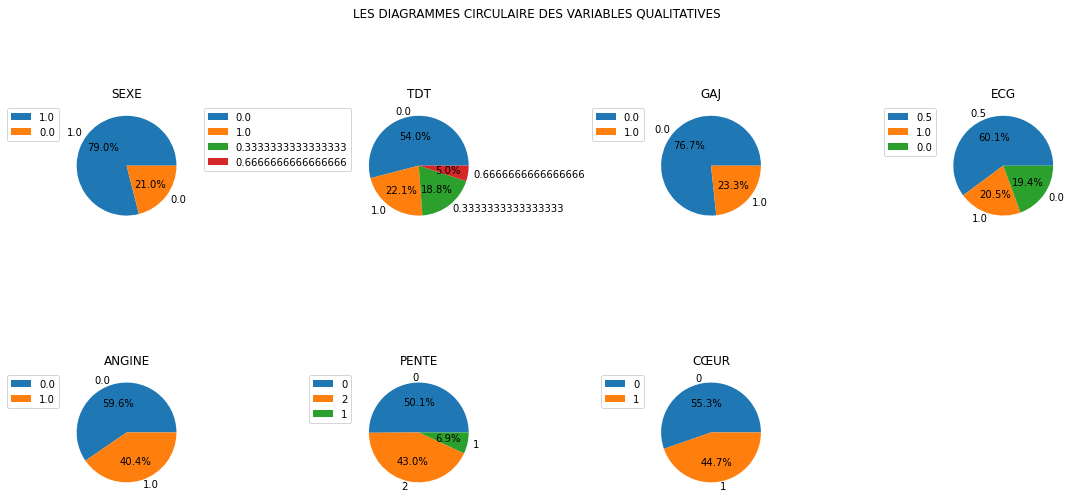

In [64]:
# representation graphique des variables qualitatives

qual = ['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR'] # la liste des variables qualitatives

plt.figure(tight_layout = True, figsize = (15,8))
plt.suptitle("LES DIAGRAMMES CIRCULAIRE DES VARIABLES QUALITATIVES")
for y,x in enumerate(qual):
    eff = df[x].value_counts()
    modalite = df[x].unique()
    plt.subplot(2,4,y+1)
    plt.pie(eff, labels = modalite, autopct = '%1.1f%%')
    plt.legend(bbox_to_anchor = (0, 1))
    plt.title(f"{qual[y]}")
plt.show()

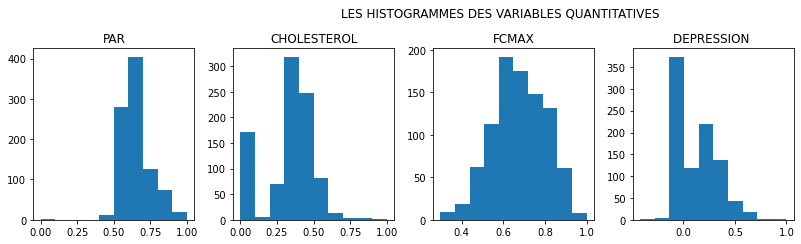

In [65]:
quant = ['PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ']

plt.figure(tight_layout = True, figsize = (14, 6))
plt.suptitle("LES HISTOGRAMMES DES VARIABLES QUANTITATIVES")
for y,x in enumerate(quant):
    plt.subplot(2,5,y+1)
    plt.hist(df[x])
    plt.title(f"{quant[y]}")
plt.show()